In [4]:
import numpy as np
import math
import pandas as pd
from statistics import mean, stdev
from tqdm.notebook import trange, tqdm
import warnings
warnings.simplefilter('ignore')

import sys
sys.path.append("../src")

# from main import Agent, run
# # from make_sfm import run_sfm
# from social_force_model import SocialForceModel
# from destination_choice_model import DestinationChoiceModel

In [ ]:
from SFM import run_SFM

In [5]:
data_path = '/home/aaf15257iq/work/GC_annotation/simulated_data/duration_60_0.8/GC_Dataset_ped1-12685_time2400-2460_interp0_xrange5-25_yrange15-35_sfm.npy'
data = np.load(data_path, allow_pickle=True)
print(data)
print(len(data[1]))
print(len(data[2]))
meta_data, trajectories, destinations, obstacles = data
num_steps = max([u[-1][-1] for u in trajectories]) + 1
print(num_steps)

[{'time_unit': 0.8, 'version': 'v2.2', 'begin_frame': 60000, 'interpolation': 0, 'source': 'GC dataset'}
 list([[(5.37480495497188, 27.514283563009784, 31), (5.45931413075173, 27.208498775693485, 31), (5.579043115055281, 26.57802725720306, 32), (5.660087010906722, 25.819390526020822, 33), (5.6799615081853325, 25.048528920191085, 34), (5.682982357496529, 24.295910016238928, 35), (5.718958333274218, 23.56437749794171, 36), (5.771026535405919, 22.800646972825387, 37), (5.7755856830078, 22.027238884346694, 38), (5.763909817283714, 21.275981357128924, 39), (5.80434017383458, 20.51669435582952, 40), (5.784472172031303, 19.752055695750354, 41), (5.74666222545342, 18.99299385088639, 42), (5.705094144648845, 18.235005914282933, 43), (5.662710586508077, 17.477220728472012, 44), (5.6201379470744, 16.719475776836322, 45), (5.577515532064578, 15.961737306405505, 46)], [(5.475508061924621, 25.99364533093306, 9), (5.800018581976668, 25.437894997048417, 9), (6.271514700284978, 24.468147818846905, 10),

In [1]:
import numpy as np
import math
import pandas as pd
from statistics import mean, stdev
from tqdm.notebook import trange, tqdm
import warnings
import argparse
import time
from tqdm import tqdm
import yaml
import os
import subprocess
import argparse
import matplotlib.pyplot as plt
from collections import defaultdict
from count import make_hist

ped_num 6462
most_long 299.2
long_num 72


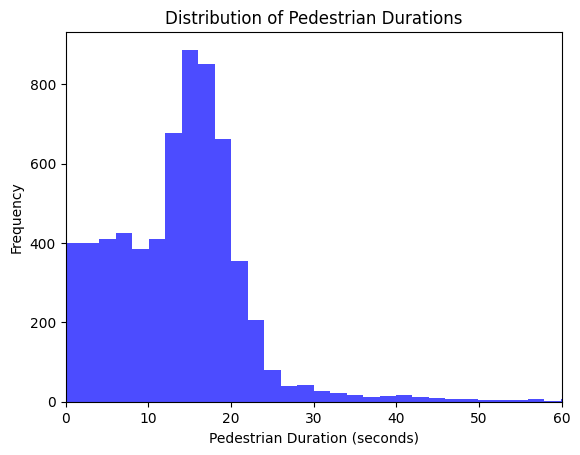

<Figure size 640x480 with 0 Axes>

In [2]:
make_hist()

In [ ]:
meta_data, trajectories, destinations, obstacles = data
goal_positions = []
for u in destinations:
    goal_positions.append(u[0][:2])
print(goal_positions)

mean_v = []
for u in trajectories:
    first = u[0][:2]
    last = u[-1][:2]
    tau = u[-1][-1] - u[0][-1]
    first, last = np.array(first), np.array(last)
    v = (last - first) / tau
    v = v.tolist()
    mean_v.append(v)
print(mean_v)
mean_vx = [v[0] for v in mean_v]
mean_vy = [v[1] for v in mean_v]
print(mean_vx)
print(mean_vy)

In [ ]:
params_sfm = {
    "dt": 1/30,
    "A1": 2.1,
    "B": 0.3,
    "A2": 1,
    "tau": 0.5,
    "phi": 100,
    "c": 0.5
}
walls = np.array(obstacles)
walls_points = walls.tolist()
print(obstacles)
print(walls)
print(walls_points)

In [ ]:
num_steps = max([u[-1][-1] for u in trajectories]) + 1
print(num_steps)

sfm = SocialForceModel(params_sfm, walls_points)

In [ ]:
#trajectoriesの中身の最初の1stepのx,y座標を取り出す
traj = []
for i in range(len(trajectories)):
    x = trajectories[i][0][0]
    y = trajectories[i][0][1]
    t = trajectories[i][0][-1]
    traj.append([x, y, t])
print(traj)

In [ ]:
agents = run_SFM(traj, mean_v, num_steps, sfm, destinations)
print(agents)

In [1]:
import yaml
import os

In [7]:
# YAMLファイルのパス
file_path = '/home/aaf15257iq/work/equivariant-PIML/src/configs/data_configs/data_vis.yaml'

# YAMLファイルを読み込む
with open(file_path, 'r') as file:
    yaml_data = yaml.load(file, Loader=yaml.FullLoader)

# YAMLデータをリストとして受け取る
data_list = yaml_data
data_path = data_list['vis']
for i in range(len(data_path)):
    print(data_path[i])

../data/GC_dataset/GC_Dataset_ped1-12685_time2344-2404_interp9_xrange5-25_yrange15-35.npy
../data/GC_dataset/GC_Dataset_ped1-12685_time2344-2404_interp9_xrange5-25_yrange15-35_sfm.npy


In [4]:
# YAMLファイルのパス
file_path = 'config.yaml'

# YAMLファイルを読み込む
with open(file_path, 'r') as file:
    yaml_data = yaml.load(file, Loader=yaml.FullLoader)

# パスの指定部分の取得
path = yaml_data['input']

# パスにあるファイルの取得
file_list = []
for filename in os.listdir(path):
    file_path = os.path.join(path, filename)
    if os.path.isfile(file_path):
        file_list.append(file_path)

# ファイルリストの表示
for file_path in file_list:
    print(file_path)

/home/aaf15257iq/work/GC_annotation/processed_data/duration_60/GC_Dataset_ped1-12685_time900-960_interp9_xrange5-25_yrange15-35.npy
/home/aaf15257iq/work/GC_annotation/processed_data/duration_60/GC_Dataset_ped1-12685_time1620-1680_interp9_xrange5-25_yrange15-35.npy
/home/aaf15257iq/work/GC_annotation/processed_data/duration_60/GC_Dataset_ped1-12685_time240-300_interp9_xrange5-25_yrange15-35.npy
/home/aaf15257iq/work/GC_annotation/processed_data/duration_60/GC_Dataset_ped1-12685_time480-540_interp9_xrange5-25_yrange15-35.npy
/home/aaf15257iq/work/GC_annotation/processed_data/duration_60/GC_Dataset_ped1-12685_time2940-3000_interp9_xrange5-25_yrange15-35.npy
/home/aaf15257iq/work/GC_annotation/processed_data/duration_60/GC_Dataset_ped1-12685_time3180-3240_interp9_xrange5-25_yrange15-35.npy
/home/aaf15257iq/work/GC_annotation/processed_data/duration_60/GC_Dataset_ped1-12685_time2520-2580_interp9_xrange5-25_yrange15-35.npy
/home/aaf15257iq/work/GC_annotation/processed_data/duration_60/GC_Da